# ADALINE

In [5]:
#モジュールの読み込み
import os
import pandas as pd


#Irisデータセットを公開しているGitHubのURL
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

#csvファイルを読み込み
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

#データを下から5件表示
df.tail(5)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#ADALINEクラスの定義
class AdalineGD(object):
    #コンストラクタでパラメータの初期化(学習率、訓練回数)
    def __init__(self, lr=0.02, n_iter=100, random_state=1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state

    #モデル適合のための関数
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        #平均0、標準偏差0.01
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        #for文で訓練回数分処理を実行
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            error = (y - output)
            self.w_[1:] += self.lr * X.T.dot(error)
            self.w_[0] += self.lr * error.sum()
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    #総入力の計算
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    #活性化関数の定義
    def activation(self, X):
        return X

    #モデル適合の関数
    def predict(self, X):
        #self.activation(self.net_input(X)) >= 0.0のときに1、違う場合は-1
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## データの可視化

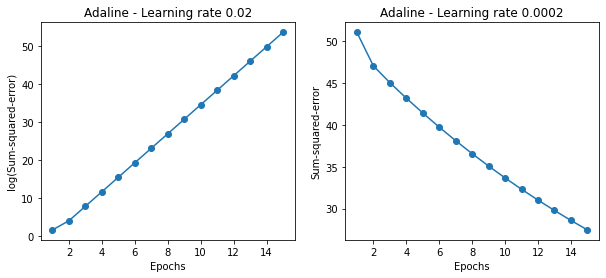

In [7]:
#モジュールの読み込み
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1-100行目×4列(目的変数)の抽出
y = df.iloc[0:100, 4].values
#y==Iris-setosaならば-1,誤りなら1
y = np.where(y == 'Iris-setosa', -1, 1)

# 1-100行目の1.3列目を抽出
X = df.iloc[0:100, [0, 2]].values

#グラフの作成
#1行2列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#学習率0.02の場合のADALINE  今回は適正
ada1 = AdalineGD(n_iter=15, lr=0.02).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.02')

#学習率0.0002の場合のADALINE  大域的最小値を超えてしまった
ada2 = AdalineGD(n_iter=15, lr=0.0002).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0002')

#グラフの表示
plt.show()

## 標準化

In [8]:
# データのコピー
X_std = np.copy(X)

# 訓練データの平均を全ての訓練データから引き、標準偏差で割る。
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

### 標準化後

In [9]:
#モジュールの読み込み
from matplotlib.colors import ListedColormap

#決定境界を可視化する関数
def plot_decision_line(X, y, classifier, resolution=0.02):

    # マーカーとカラーマップの設定
    markers = ('s', 'x', 'o', '^', 'v')
    sensy_accent =  ('#5073ED', '#FA8EB5', '#A7C0FD', '#4B4C80', '#F4458C')
    #np.unique()は重複を削除した配列
    cmap = ListedColormap(sensy_accent[:len(np.unique(y))])

    # 決定領域
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #配列の要素から格子列を生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    #predictで予測
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #reshapeで配列の形状を変更
    Z = Z.reshape(xx1.shape)
    #contourf()は等高線を表す
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    #x軸とy軸の範囲を制限
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for ix, lc in enumerate(np.unique(y)):
        plt.scatter(x=X[y == lc, 0], 
                    y=X[y == lc, 1],
                    alpha=0.8, 
                    c=sensy_accent[ix],
                    marker=markers[ix], 
                    label=lc, 
                    edgecolor='black')

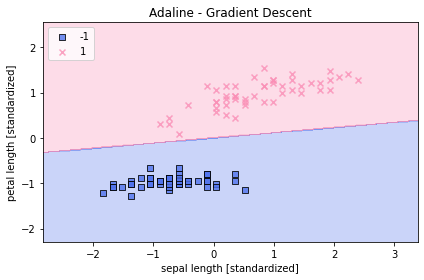

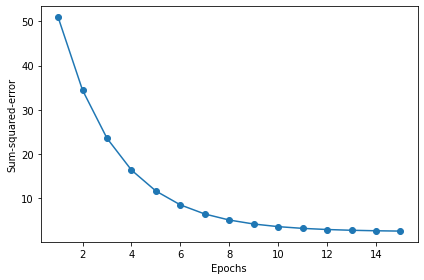

In [10]:
# エポック15, 学習率0.01
ada_gd = AdalineGD(n_iter=15, lr=0.01)
ada_gd.fit(X_std, y)

plot_decision_line(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()

plt.show()

<br>
<br>

## 確率的勾配法を用いたADALINE

In [13]:
# 確率的勾配法を用いたADALINE
class AdalineSGD(object):
    def __init__(self, lr=0.01, n_iter=10, shuffle=True, random_state=None):
        self.lr = lr
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
     
    # 訓練データごとに重みを更新
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    # オンライン学習に合わせて、重みの再初期化を行わないメソッド
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    # 各エポックの前に訓練データをシャッフル
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    # 重みを小さな乱数に初期化
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    # ADALINEの学習規則を用いて重みを更新
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.lr * xi.dot(error)
        self.w_[0] += self.lr * error
        cost = 0.5 * error**2
        return cost
    
    # 総入力を計算
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 活性化関数
    def activation(self, X):
        return X

    # 次ステップのクラスラベルを返す
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

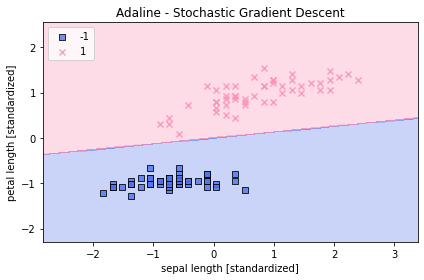

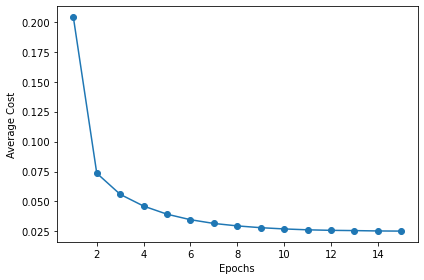

In [15]:
ada_sgd = AdalineSGD(n_iter=15, lr=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_line(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()

plt.show()